# A SIMPLE CONVOLUTIONAL NEURAL NETWORK FROM SCRATCH

_**Building a Simple Convolutional Neural Network (CNN) from Scratch on MNIST dataset.**_

**The Experiment:**
- Load MNIST dataset containing of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.
- Scales the data to keep the range of pixel values between 0 and 1.
- Split the data into train, validation and test set
- Change the dimension of each of the data set to feed into the neural network.
- Apply one-hot-encoding to labels for model to compare with its output.
- Create an appropriate convolutional neural network.
- Train the model with checkpoint and early stopping and measure performance over validation data during traning.
- Analyze the learning curve and evaluate model's performance on the test set. 

## Importing Packages

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

2025-11-20 06:50:15.265212: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-20 06:50:15.274938: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-20 06:50:15.643045: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-20 06:50:16.982668: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

## Data Acquisition & Analysis

In [22]:
# Loads MNIST dataset
# NOTE: Downloading for the first time may take few minutes to complete

(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [23]:
# Checks the shape of the datasets

print("Full training set shape:", X_train_full.shape)
print("Test set shape:", X_test.shape)

Full training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)


In [24]:
# Checks the type of the array
X_train_full.dtype

dtype('uint8')

## Data Preprocessing

In [25]:
# As with dtype 'uint8', the data can range from 0 to 255, it transforms the data to fit 
# within a specific range like between 0 and 1, in this case, for effective neural network model training

X_train_full = X_train_full / 255.
X_test = X_test / 255.

In [26]:
# Seperates out 5000 instances from train set to be used as validation set

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=5000, random_state=42, stratify=y_train_full)

In [27]:
# To match the input shape requirement of the CNN model, a channel dimention gets added to each dataset

X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [28]:
# Checks for the updated shape
X_train.shape

(55000, 28, 28, 1)

In [ ]:
# convert class vectors to binary class matrices

num_classes = 10

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# Checks for the updated shape
y_train.shape

(55000, 10)

## Modeling

In [31]:
# Sets the global random seed for operations that rely on a random seed
tf.random.set_seed(42)

# Creates a CNN by having convolutional, pooling, dropout and dense layer in the specified order.
# Each convolutional layer is further initialized with specific kernel size and activation
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="softmax"),
])

In [ ]:
# Shows the model summary
model.summary(show_trainable=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ conv2d (Conv2D)             │ (None, 26, 26, 32)    │        320 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ max_pooling2d               │ (None, 13, 13, 32)    │          0 │   -   │
│ (MaxPooling2D)              │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv2d_1 (Conv2D)           │ (None, 11, 11, 64)    │     18,496 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ max_pooling2d_1             │ (None, 5, 5, 64)      │          0 │   -   │
│ (MaxPooling2D)              │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ flatten (Flatten)           │ (None, 1600)          │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dropout (Dropout)           │ (None, 1600)          │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense (Dense)               │ (None, 10)            │     16,010 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model

In [32]:
# Sets the model optimizer and compiles it with specific loss function and metric
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [34]:
# Fits the model with model checkpoint and early stopping configured
history = model.fit(X_train, y_train, 
                    batch_size=64,
                    epochs=50, 
                    callbacks=[
                        tf.keras.callbacks.ModelCheckpoint("./models/mnist/checkpoints/mnist.weights.keras", save_best_only=True),
                        tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
                    ],
                    validation_data=(X_val, y_val))

Epoch 1/50
860/860 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9154 - loss: 0.2774 - val_accuracy: 0.9740 - val_loss: 0.0951
Epoch 2/50
860/860 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9714 - loss: 0.0947 - val_accuracy: 0.9806 - val_loss: 0.0674
Epoch 3/50
860/860 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9781 - loss: 0.0744 - val_accuracy: 0.9834 - val_loss: 0.0547
Epoch 4/50
860/860 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9812 - loss: 0.0604 - val_accuracy: 0.9864 - val_loss: 0.0497
Epoch 5/50
860/860 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9841 - loss: 0.0517 - val_accuracy: 0.9862 - val_loss: 0.0449
Epoch 6/50
860/860 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9853 - loss: 0.0463 - val_accuracy: 0.9868 - val_loss: 0.0413
Epoch 7/50
860/860 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9863 - loss: 0.0435 - val_accuracy: 0.9892 - val_loss: 0.0372
Epoch 8/50
860/860 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9878 - loss: 0.0389 - val_accuracy: 0.

In [43]:
# Saves the trained model for later reference
# NOTE: Make sure the folder "models" exists under the current working directory

model.save("./models/mnist/mnist.keras")

## Model Evaluation
Visualizes the learning progress over train and validation set

Text(0.5, 0.98, 'Learning Curves')

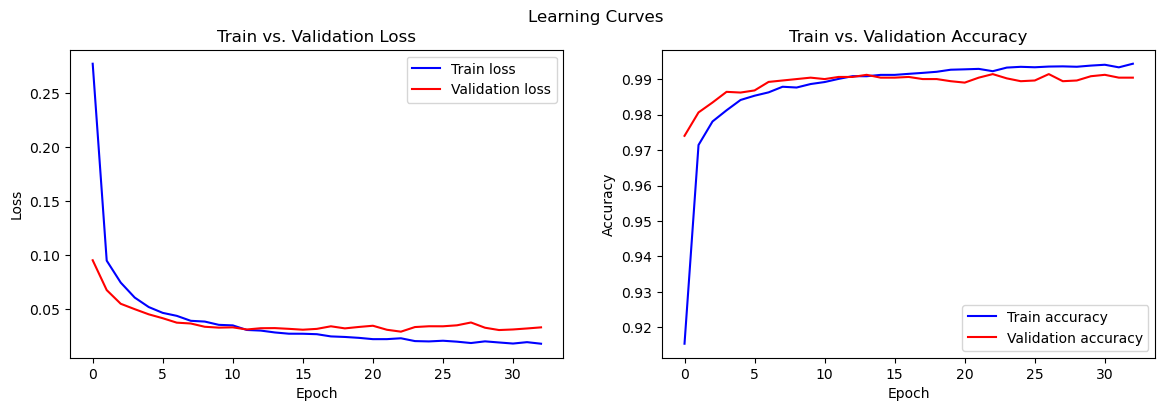

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(14,4))

ax1.plot(history.history["loss"], "b-", label="Train loss")
ax1.plot(history.history["val_loss"], "r-", label="Validation loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
ax1.set_title("Train vs. Validation Loss")

ax2.plot(history.history["accuracy"], "b-", label="Train accuracy")
ax2.plot(history.history["val_accuracy"], "r-", label="Validation accuracy")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.legend()
ax2.set_title("Train vs. Validation Accuracy")

fig.suptitle("Learning Curves")

In [ ]:
print(f"Model was its best (lowest validation loss) at epoch {np.argmin(history.history["val_loss"]) + 1}")

Model was its best (lowest validation loss) at epoch 23


In [46]:
# Evaluates the model on test set
model_test_performance = model.evaluate(X_test, y_test)

print(f"Test Performance: \
      Loss: {model_test_performance[1]:.2f}, Accuracy: {model_test_performance[1]*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9936 - loss: 0.0227
Test Performance:       Loss: 0.99, Accuracy: 99.36%


**Observations:**

- The model started getting slightly overfitted beyond 12th epoch.

- The model was its best (lowest validation loss) at 23rd epoch and the training was terminated for not having any further improvement on validation loss for the next 10 epochs (patience).

- The test set performance by the best model was 99.36%.
